# 01 - Simple ES Benchmark Function
### [Last Update: March 2022][![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RobertTLange/evosax/blob/main/examples/01_classic_benchmark.ipynb)

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

# !pip install -q git+https://github.com/RobertTLange/evosax.git@main

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2D Rosenbrock with CMA-ES

`evosax` implements a set of different classic benchmark functions. These include multi-dimensional versions of `quadratic`, `rosenbrock`, `ackley`, `griewank`, `rastrigin`, `schwefel`, `himmelblau`, `six-hump`. In the following we focus on the 2D Rosenbrock case, but feel free to play around with the others.

2024-08-28 12:10:52.121278: W external/xla/xla/service/gpu/nvptx_compiler.cc:765] The NVIDIA driver's CUDA version is 12.5 which is older than the ptxas CUDA version (12.6.20). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


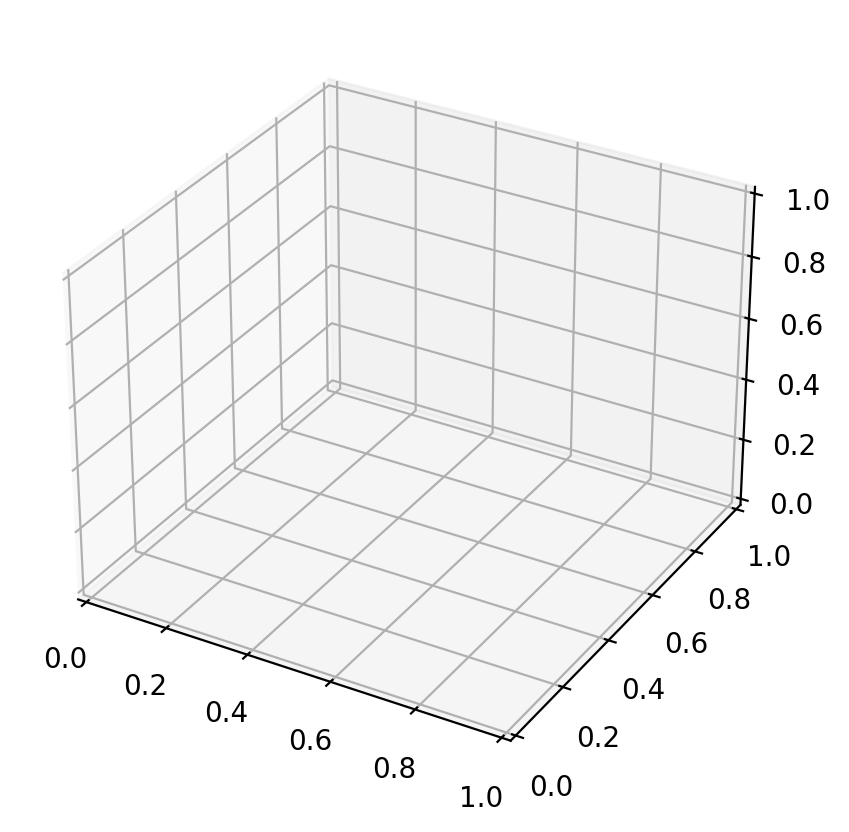

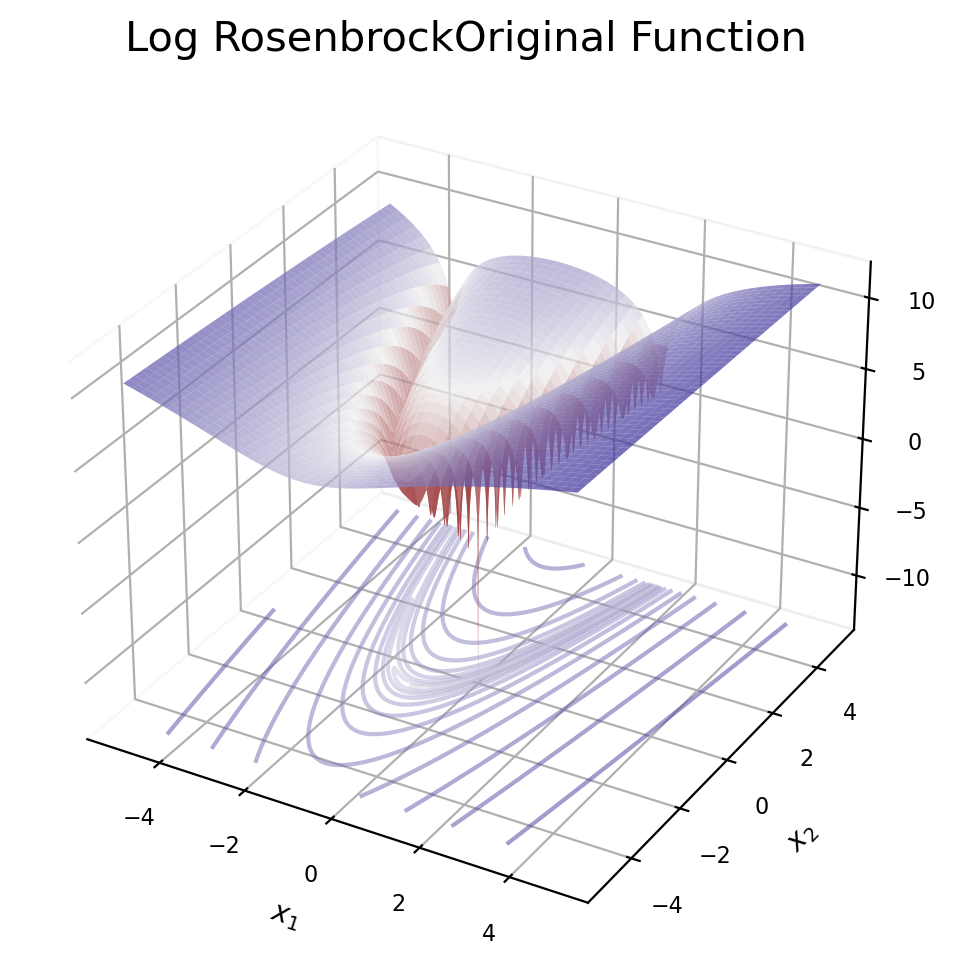

In [5]:
import jax
import jax.numpy as jnp
from evosax import CMA_ES
from evosax.problems import BBOBFitness

# Instantiate the problem evaluator
rosenbrock = BBOBFitness("RosenbrockOriginal", num_dims=2, seed_id=2)
rosenbrock.visualize(plot_log_fn=True)

In [6]:
# Instantiate the search strategy
rng = jax.random.PRNGKey(0)
strategy = CMA_ES(popsize=20, num_dims=2, elite_ratio=0.5)
es_params = strategy.default_params.replace(init_min=-2, init_max=2)

state = strategy.initialize(rng, es_params)

# Run ask-eval-tell loop - NOTE: By default minimization
for t in range(50):
    rng, rng_gen, rng_eval = jax.random.split(rng, 3)
    x, state = strategy.ask(rng_gen, state, es_params)
    fitness = rosenbrock.rollout(rng_eval, x)
    state = strategy.tell(x, fitness, state, es_params)

    if (t + 1) % 10 == 0:
        print("CMA-ES - # Gen: {}|Fitness: {:.5f}|Params: {}".format(
            t+1, state.best_fitness, state.best_member))

CMA-ES - # Gen: 10|Fitness: 0.09788|Params: [-0.2840176  -0.47424704]
CMA-ES - # Gen: 20|Fitness: 0.00002|Params: [-0.00139426 -0.00232257]
CMA-ES - # Gen: 30|Fitness: 0.00000|Params: [-0.00164362 -0.00325301]
CMA-ES - # Gen: 40|Fitness: 0.00000|Params: [-6.2842482e-06 -1.3640241e-05]
CMA-ES - # Gen: 50|Fitness: 0.00000|Params: [-1.1450652e-08  3.0283559e-08]


## 2D Rosenbrock with Other ES

In [8]:
from evosax import Strategies
rng = jax.random.PRNGKey(0)

for s_name in ["SimpleES", "SimpleGA", "PSO", "DE", "Sep_CMA_ES",
               "Full_iAMaLGaM", "Indep_iAMaLGaM", "MA_ES", "LM_MA_ES",
               "RmES", "GLD", "SimAnneal", "GESMR_GA", "SAMR_GA"]:
    strategy = Strategies[s_name](popsize=20, num_dims=2)
    es_params = strategy.default_params
    es_params = es_params.replace(init_min=-2, init_max=2)
    state = strategy.initialize(rng, es_params)

    for t in range(30):
        rng, rng_gen, rng_eval = jax.random.split(rng, 3)
        x, state = strategy.ask(rng_gen, state, es_params)
        fitness = rosenbrock.rollout(rng_eval, x)
        state = strategy.tell(x, fitness, state, es_params)

        if (t + 1) % 5 == 0:
            print("{} - # Gen: {}|Fitness: {:.2f}|Params: {}".format(
                s_name, t+1, state.best_fitness, state.best_member))
    print(20*"=")

SimpleES - # Gen: 5|Fitness: 2.41|Params: [0.5749427 1.3363407]
SimpleES - # Gen: 10|Fitness: 0.05|Params: [-0.02394074 -0.06951416]
SimpleES - # Gen: 15|Fitness: 0.02|Params: [0.05201912 0.11855024]
SimpleES - # Gen: 20|Fitness: 0.02|Params: [0.05201912 0.11855024]
SimpleES - # Gen: 25|Fitness: 0.02|Params: [0.05201912 0.11855024]
SimpleES - # Gen: 30|Fitness: 0.02|Params: [0.05201912 0.11855024]
SimpleGA - # Gen: 5|Fitness: 0.05|Params: [-0.23124489 -0.40957353]
SimpleGA - # Gen: 10|Fitness: 0.03|Params: [-0.13031456 -0.23322381]
SimpleGA - # Gen: 15|Fitness: 0.02|Params: [-0.11532619 -0.20849138]
SimpleGA - # Gen: 20|Fitness: 0.00|Params: [-0.00291448 -0.00076399]
SimpleGA - # Gen: 25|Fitness: 0.00|Params: [-0.00291448 -0.00076399]
SimpleGA - # Gen: 30|Fitness: 0.00|Params: [0.0479427  0.09704389]
PSO - # Gen: 5|Fitness: 0.32|Params: [-0.01428866  0.02790421]
PSO - # Gen: 10|Fitness: 0.19|Params: [-0.32952115 -0.5220759 ]
PSO - # Gen: 15|Fitness: 0.12|Params: [-0.33950207 -0.5610803

# Try out one of the many `evosax` algorithms!

In [9]:
Strategies.keys()

dict_keys(['SimpleGA', 'SimpleES', 'CMA_ES', 'DE', 'PSO', 'OpenES', 'PGPE', 'PBT', 'PersistentES', 'ARS', 'Sep_CMA_ES', 'BIPOP_CMA_ES', 'IPOP_CMA_ES', 'Full_iAMaLGaM', 'Indep_iAMaLGaM', 'MA_ES', 'LM_MA_ES', 'RmES', 'GLD', 'SimAnneal', 'SNES', 'xNES', 'ESMC', 'DES', 'SAMR_GA', 'GESMR_GA', 'GuidedES', 'ASEBO', 'CR_FM_NES', 'MR15_GA', 'RandomSearch', 'LES', 'LGA', 'NoiseReuseES', 'HillClimber', 'EvoTF_ES'])